In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow import keras 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense,Conv1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [3]:
excel_data = pd.read_excel('Dataset\Coca\Coca(2015-2022).xlsx')
df = pd.DataFrame(excel_data)
df.head()

,Market,Date,Grade,Arrivals,Unit,Min,Max,Modal,Variety,District
0,MANGALURU,2019-04-01 00:00:00,AVERAGE,228,Quintal,12000,18000,16000,COCA,Dakshina Kannada
1,MANGALURU,2019-04-02 00:00:00,AVERAGE,227,Quintal,12000,18000,16000,COCA,Dakshina Kannada
2,MANGALURU,2019-04-03 00:00:00,AVERAGE,226,Quintal,12000,18000,16000,COCA,Dakshina Kannada
3,MANGALURU,2019-04-04 00:00:00,AVERAGE,228,Quintal,12000,18000,16000,COCA,Dakshina Kannada
4,MANGALURU,2019-04-05 00:00:00,AVERAGE,231,Quintal,12000,18000,16000,COCA,Dakshina Kannada


In [4]:
df.isna().sum()

Market      0
Date        0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
Variety     0
District    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    1867 non-null   object
 1   Date      1867 non-null   object
 2   Grade     1867 non-null   object
 3   Arrivals  1867 non-null   int64 
 4   Unit      1867 non-null   object
 5   Min       1867 non-null   int64 
 6   Max       1867 non-null   int64 
 7   Modal     1867 non-null   int64 
 8   Variety   1867 non-null   object
 9   District  1867 non-null   object
dtypes: int64(4), object(6)
memory usage: 146.0+ KB


In [6]:
df_test = df
df_test['Date']=pd.to_datetime(df['Date'])

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Market    1867 non-null   object        
 1   Date      1867 non-null   datetime64[ns]
 2   Grade     1867 non-null   object        
 3   Arrivals  1867 non-null   int64         
 4   Unit      1867 non-null   object        
 5   Min       1867 non-null   int64         
 6   Max       1867 non-null   int64         
 7   Modal     1867 non-null   int64         
 8   Variety   1867 non-null   object        
 9   District  1867 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 146.0+ KB


In [8]:
df_test.sort_values(by='Date',inplace=True)

In [9]:
df_test = df[['Date','Arrivals','Min','Max','Modal']]
df_test

,Date,Arrivals,Min,Max,Modal
801,2015-01-01,53,8900,16000,14000
802,2015-01-02,55,8900,16000,14000
803,2015-01-03,55,8900,16000,14000
804,2015-01-05,58,8900,16000,14000
805,2015-01-06,40,8900,16000,14000
...,...,...,...,...,...
1862,2022-11-04,263,25000,34000,30000
1863,2022-11-05,2900,20000,25000,24000
1864,2022-12-01,35,26000,31000,30800
1865,2022-12-04,962,22600,30400,27000


In [10]:
df_test.index = df_test['Date']
df_test

,Date,Arrivals,Min,Max,Modal
Date,,,,,
2015-01-01,2015-01-01,53,8900,16000,14000
2015-01-02,2015-01-02,55,8900,16000,14000
2015-01-03,2015-01-03,55,8900,16000,14000
2015-01-05,2015-01-05,58,8900,16000,14000
2015-01-06,2015-01-06,40,8900,16000,14000
...,...,...,...,...,...
2022-11-04,2022-11-04,263,25000,34000,30000
2022-11-05,2022-11-05,2900,20000,25000,24000
2022-12-01,2022-12-01,35,26000,31000,30800


In [11]:
df_test.drop('Date',axis=1,inplace=True)
df_test

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_19116\1244294919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('Date',axis=1,inplace=True)


,Arrivals,Min,Max,Modal
Date,,,,
2015-01-01,53,8900,16000,14000
2015-01-02,55,8900,16000,14000
2015-01-03,55,8900,16000,14000
2015-01-05,58,8900,16000,14000
2015-01-06,40,8900,16000,14000
...,...,...,...,...
2022-11-04,263,25000,34000,30000
2022-11-05,2900,20000,25000,24000
2022-12-01,35,26000,31000,30800


In [12]:
# df_test = df_test.drop('Arrivals',axis=1)

In [13]:
# df_test.to_excel('./Dataset/Coca/Coca_dataset.xlsx',index=True)

In [14]:
# df_test = df_test.drop('Modal first difference', axis=1)

In [15]:
df_1 = pd.read_csv('./Dataset/Coca/coca_test.csv')
df_1.head()

,Date,Min,Max,Modal
0,2015-01-01,8900,16000,14000
1,2015-01-02,8900,16000,14000
2,2015-01-03,8900,16000,14000
3,2015-01-05,8900,16000,14000
4,2015-01-06,8900,16000,14000


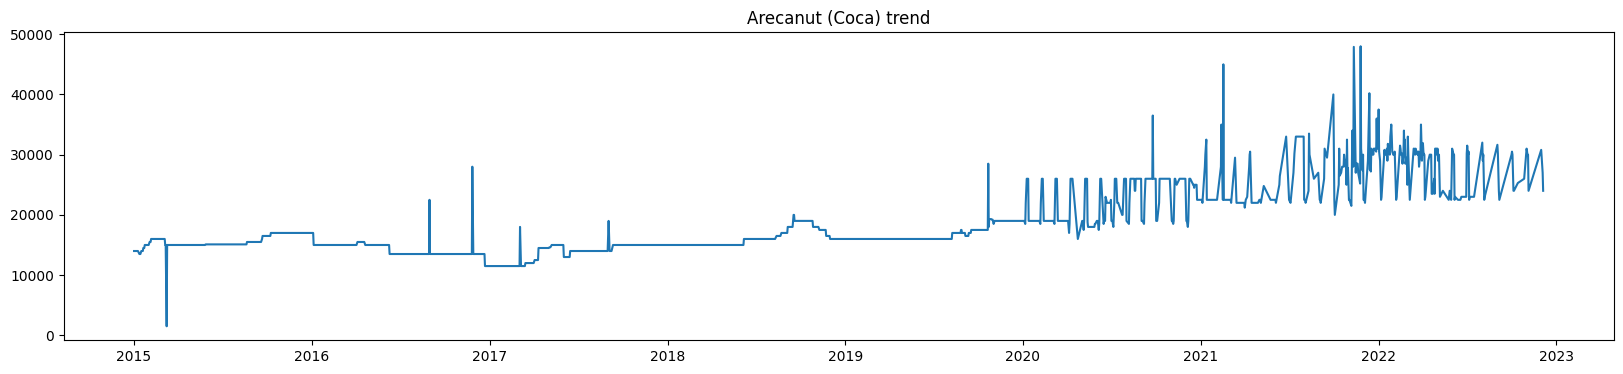

In [16]:
plt.figure(figsize=(20,4))
plt.plot(df_test['Modal'])
plt.title('Arecanut (Coca) trend')
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler 

scaler_coca = MinMaxScaler(feature_range=(0,1))

In [18]:
df_coca1 = df_test.drop('Arrivals',axis=1)

In [19]:
df_coca1

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [20]:
# df_coca1 = df_coca1.drop('Modal first difference',axis=1)

In [21]:
df_coca1

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [22]:
df_coca = df_coca1

In [23]:
df_coca

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [24]:
# Define the columns you want to scale
columns_to_scale = ['Min', 'Max', 'Modal']

# Apply MinMaxScaler to the selected columns
df_coca[columns_to_scale] = scaler_coca.fit_transform(df_coca[columns_to_scale])

In [25]:
#df_coca.drop('Modal first difference',axis=1,inplace=True)

In [26]:
#df_coca.drop('Arrivals',axis=1,inplace=True)

In [27]:
df_coca.head(10)

,Min,Max,Modal
Date,,,
2015-01-01,0.194301,0.026455,0.268817
2015-01-02,0.194301,0.026455,0.268817
2015-01-03,0.194301,0.026455,0.268817
2015-01-05,0.194301,0.026455,0.268817
2015-01-06,0.194301,0.026455,0.268817
2015-01-07,0.191710,0.026455,0.268817
2015-01-08,0.191710,0.026455,0.268817
2015-01-09,0.191710,0.026455,0.268817
2015-01-12,0.194301,0.026455,0.258065


In [28]:
df_coca.tail()

,Min,Max,Modal
Date,,,
2022-11-04,0.611399,0.502646,0.612903
2022-11-05,0.481865,0.264550,0.483871
2022-12-01,0.637306,0.423280,0.630108
2022-12-04,0.549223,0.407407,0.548387
2022-12-05,0.481865,0.264550,0.483871


In [29]:
def df_to_X_y(df, window_size=1):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2] 
        y.append(label)
    return np.array(X), np.array(y)

In [30]:
WINDOW_SIZE = 3 
X_coca, y_coca= df_to_X_y(df_coca,WINDOW_SIZE)
X_coca.shape, y_coca.shape

((1864, 3, 3), (1864, 3))

In [31]:
train_size = int(len(df_test)*0.8)
val_size = int((len(df_test) - train_size)*0.7)
test_size = len(df_test) - (train_size + val_size)

print(train_size, val_size ,test_size)

1493 261 113


In [32]:
y_coca

array([[0.19430052, 0.02645503, 0.2688172 ],
       [0.19430052, 0.02645503, 0.2688172 ],
       [0.19170984, 0.02645503, 0.2688172 ],
       ...,
       [0.6373057 , 0.42328042, 0.63010753],
       [0.5492228 , 0.40740741, 0.5483871 ],
       [0.48186528, 0.26455026, 0.48387097]])

### 1105 - 2019[start]
### 1740 - 2022[start]

In [33]:
X_train, y_train = X_coca[:1500], y_coca[:1500]
X_val, y_val = X_coca[1500:1750], y_coca[1500:1750]
X_test, y_test = X_coca[1750:] ,y_coca[1750:] 


X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1500, 3, 3), (1500, 3), (250, 3, 3), (250, 3), (114, 3, 3), (114, 3))

In [34]:
def create_model():
    model = Sequential([
        InputLayer(input_shape=(3, 3)),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(30, activation='relu'),
        Dense(3)
    ])
    return model

# Instantiate the model using the create_model function
model_coca = create_model()

d:\Asus_win64\Code\Python\Machine_Learning\Internship\Internship Repository Fork\aiml-internship\.internship-project-venv\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [36]:
model_coca.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,611 (92.23 KB)

 Trainable params: 23,611 (92.23 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model_coca.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

### Adding Callbacks and Early Stopping

In [42]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/Coca/coca_model.keras")
earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

### Tensorboard Logs

In [43]:
import os
root_logdir = os.path.join('models','Coca','coca_model_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)


In [44]:
hist_coca = model_coca.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=2, callbacks=[checkpoint_cb, earlystopping_cb, tensorboard_cb])

Epoch 1/100
47/47 - 4s - 75ms/step - loss: 0.0346 - mean_absolute_error: 0.1623 - val_loss: 0.1299 - val_mean_absolute_error: 0.3242
Epoch 2/100
47/47 - 0s - 9ms/step - loss: 0.0165 - mean_absolute_error: 0.1024 - val_loss: 0.0777 - val_mean_absolute_error: 0.2366
Epoch 3/100
47/47 - 0s - 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0572 - val_loss: 0.0449 - val_mean_absolute_error: 0.1629
Epoch 4/100
47/47 - 0s - 9ms/step - loss: 0.0020 - mean_absolute_error: 0.0325 - val_loss: 0.0359 - val_mean_absolute_error: 0.1360
Epoch 5/100
47/47 - 0s - 9ms/step - loss: 0.0016 - mean_absolute_error: 0.0283 - val_loss: 0.0341 - val_mean_absolute_error: 0.1303
Epoch 6/100
47/47 - 0s - 9ms/step - loss: 0.0015 - mean_absolute_error: 0.0272 - val_loss: 0.0328 - val_mean_absolute_error: 0.1271
Epoch 7/100
47/47 - 0s - 9ms/step - loss: 0.0014 - mean_absolute_error: 0.0262 - val_loss: 0.0316 - val_mean_absolute_error: 0.1236
Epoch 8/100
47/47 - 0s - 10ms/step - loss: 0.0013 - mean_absolute_error: 0.

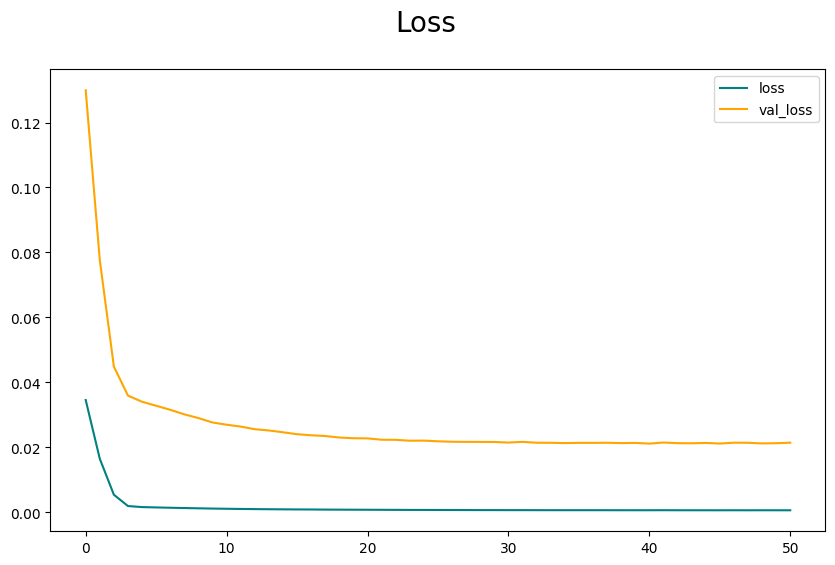

In [45]:
plt.figure(figsize=(10,6))
plt.plot(hist_coca.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist_coca.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [46]:
X_train.shape

(1500, 3, 3)

In [47]:
train_predictions = model_coca.predict(X_train, verbose=0)

In [48]:
train_predictions

array([[0.19375946, 0.0384472 , 0.26440138],
       [0.19375946, 0.0384472 , 0.26440138],
       [0.19375946, 0.0384472 , 0.26440138],
       ...,
       [0.52544135, 0.322446  , 0.5059652 ],
       [0.45978585, 0.27899134, 0.4629584 ],
       [0.3999678 , 0.23956342, 0.4176002 ]], dtype=float32)

In [49]:
train_predictions.shape
#train_prediction

(1500, 3)

In [50]:
y_train.shape

(1500, 3)

In [51]:
y_train_pred = scaler_coca.inverse_transform(train_predictions)
y_train_pred.shape

(1500, 3)

In [52]:
y_train_pred

array([[ 8879.115, 16453.305, 13794.664],
       [ 8879.115, 16453.305, 13794.664],
       [ 8879.115, 16453.305, 13794.664],
       ...,
       [21682.035, 27188.457, 25027.383],
       [19147.734, 25545.871, 23027.564],
       [16838.756, 24055.498, 20918.41 ]], dtype=float32)

In [53]:
x = pd.DataFrame({'Train predictions(scaled)':train_predictions.flatten(),
                  'Train_prediction (inverse_transformed)':y_train_pred.flatten(),
                  'Actual':scaler_coca.inverse_transform(y_train).flatten()})

x.head(20)

,Train predictions(scaled),Train_prediction (inverse_transformed),Actual
0,0.193759,8879.115234,8900.0
1,0.038447,16453.304688,16000.0
2,0.264401,13794.664062,14000.0
3,0.193759,8879.115234,8900.0
4,0.038447,16453.304688,16000.0
5,0.264401,13794.664062,14000.0
6,0.193759,8879.115234,8800.0
7,0.038447,16453.304688,16000.0
8,0.264401,13794.664062,14000.0
9,0.192970,8848.636719,8800.0


In [54]:
X_train.shape, y_train.shape

((1500, 3, 3), (1500, 3))

In [55]:
def plot_predictions(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'prediction_Min': predictions[:, 0],
                                'Actual_Min': y[:, 0],
                              'prediction_Max': predictions[:, 1],
                                'Actual_Max': y[:, 1],
                              'prediction_Modal': predictions[:, 2],
                                'Actual_Modal': y[:, 2]})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Min'][start:end],color='orange',label='Predictions_Min')
    plt.plot(df['Actual_Min'][start:end],color='green',label='Actual_Min')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Max'][start:end],color='orange',label='Predictions_Max')
    plt.plot(df['Actual_Max'][start:end],color='green',label='Actual_Max')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show() 
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Modal'][start:end],color='orange',label='Predictions_Modal')
    plt.plot(df['Actual_Modal'][start:end],color='green',label='Actual_Modal')
    plt.title(tag)
    plt.legend(loc='upper left')

Mean absolute error for Train prediction is 0.011201071307236238
-------------------------------------------------------------------------------------
r2 for Train prediction is 82.15641686017308
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.193759    0.194301        0.038447    0.026455          0.264401   
1        0.193759    0.194301        0.038447    0.026455          0.264401   
2        0.193759    0.191710        0.038447    0.026455          0.264401   
3        0.192970    0.191710        0.038426    0.026455          0.264330   
4        0.192171    0.191710        0.038436    0.026455          0.264272   
5        0.191392    0.194301        0.038470    0.026455          0.264220   
6        0.191967    0.194301        0.037603    0.026455          0.262436   
7        0.192939    0.194301        0.036820    0.026455          0.260653   
8      

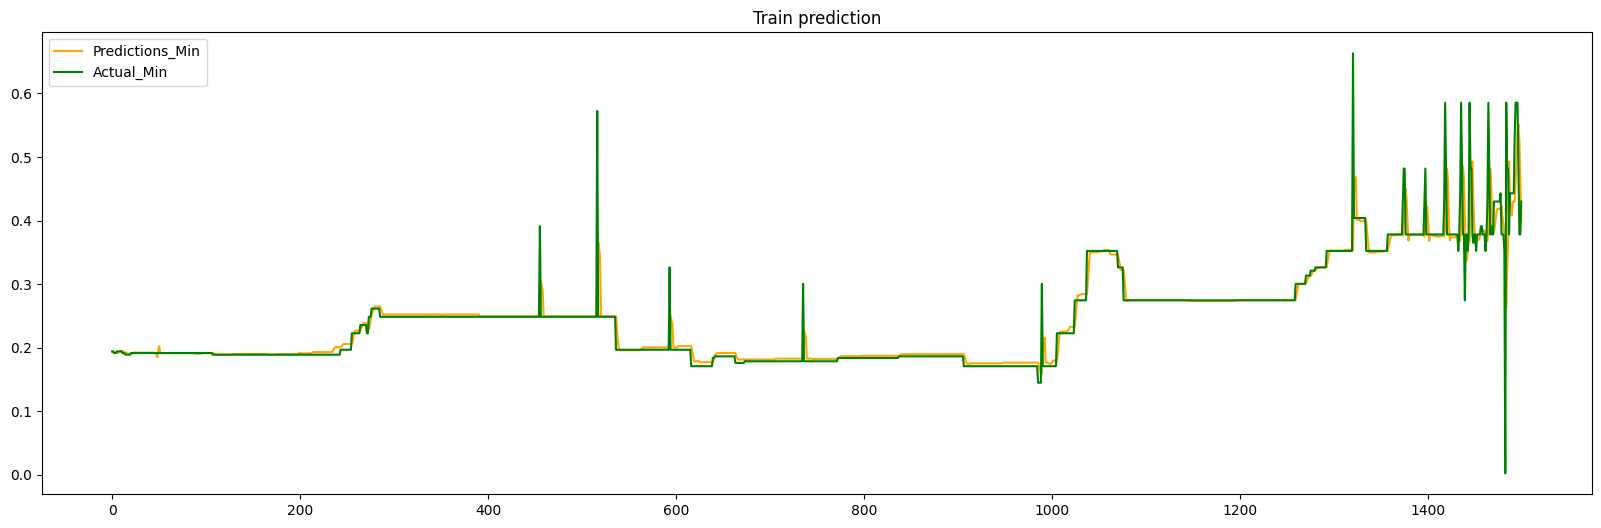

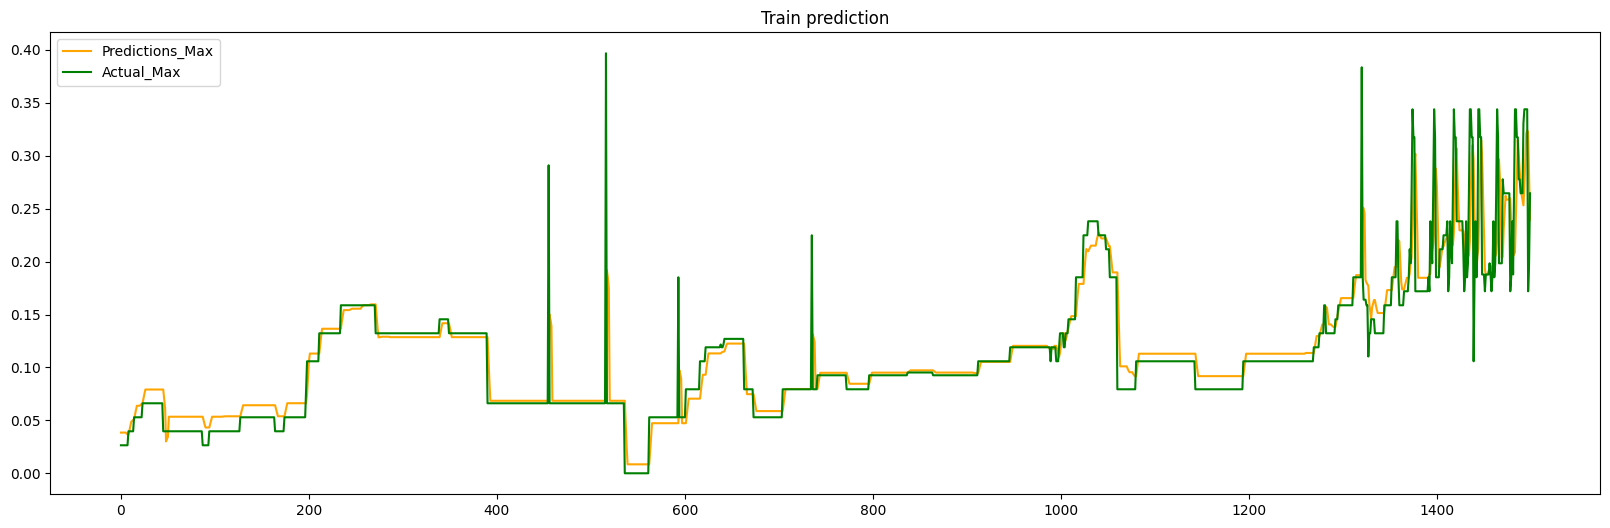

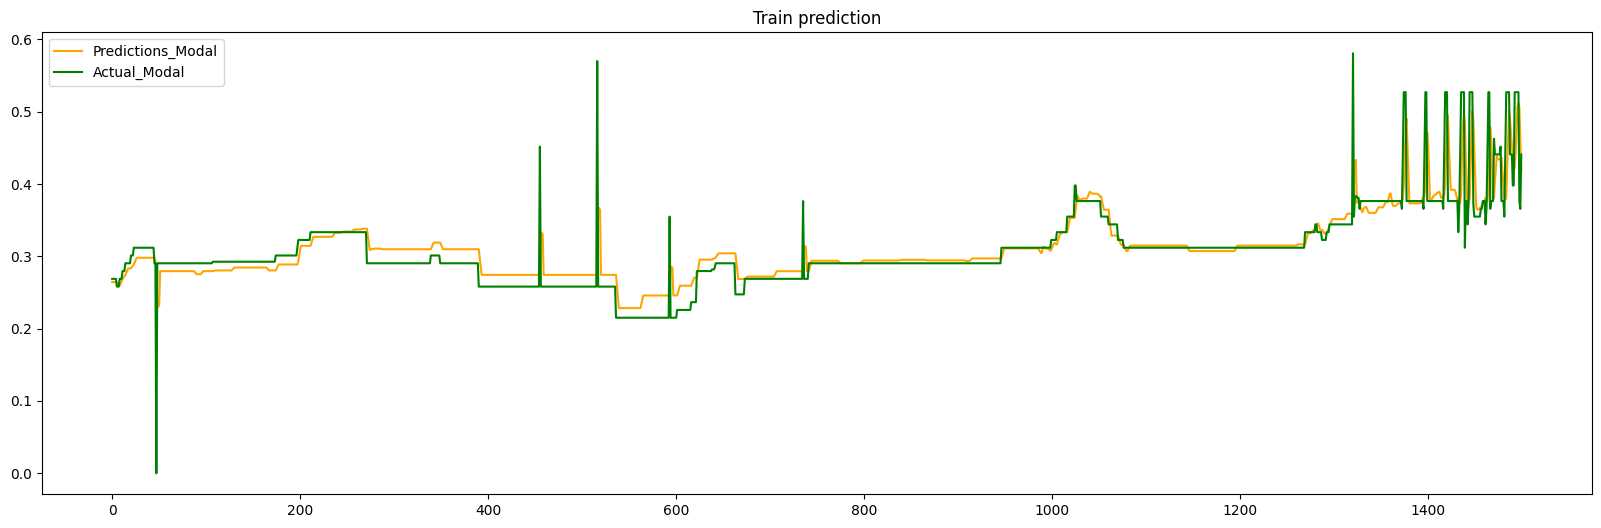

In [56]:
plot_predictions(model_coca, X_train, y_train, start=0, end=len(X_train), tag='Train prediction')

Mean absolute error for Val prediction is 0.09185091132788176
-------------------------------------------------------------------------------------
r2 for Val prediction is 9.564085643370191
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.394070    0.481865        0.219906    0.343915          0.394582   
1        0.423119    0.481865        0.262414    0.317460          0.436263   
2        0.450020    0.378238        0.292436    0.317460          0.475021   
3        0.434655    0.585492        0.301812    0.343915          0.490472   
4        0.461814    0.481865        0.306691    0.343915          0.494678   
5        0.464049    0.481865        0.310340    0.317460          0.496072   
6        0.493010    0.481865        0.314854    0.291005          0.500621   
7        0.460991    0.481865        0.300430    0.291005          0.486190   
8        0.4

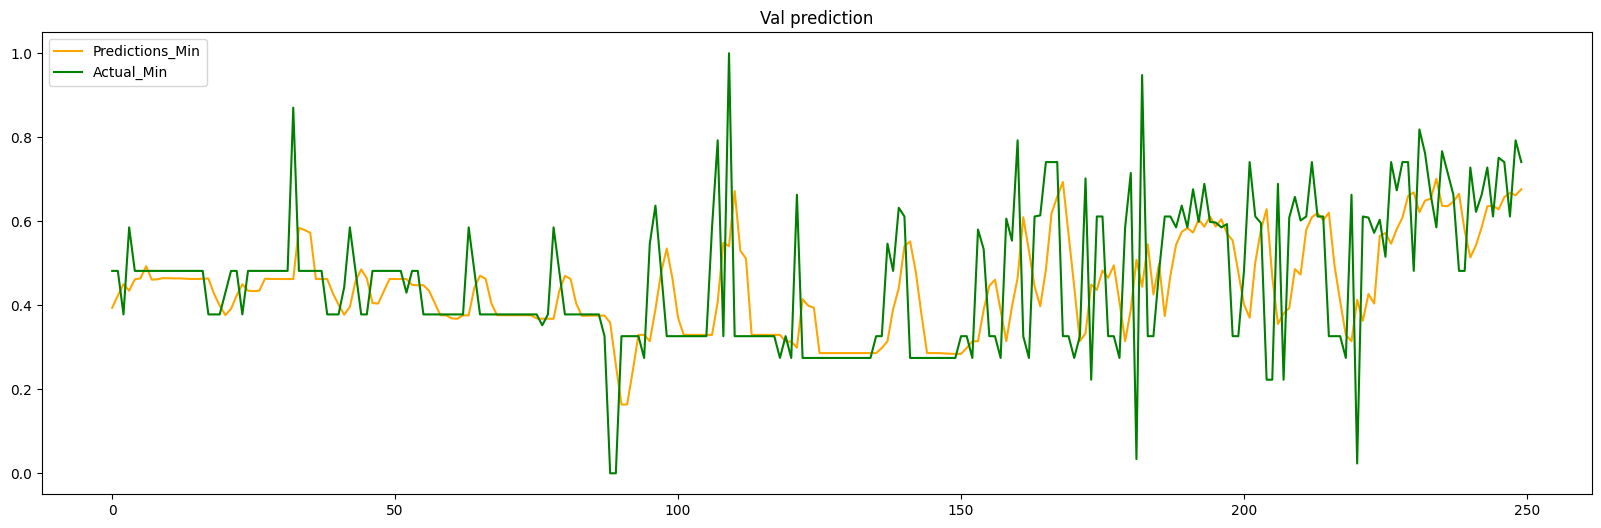

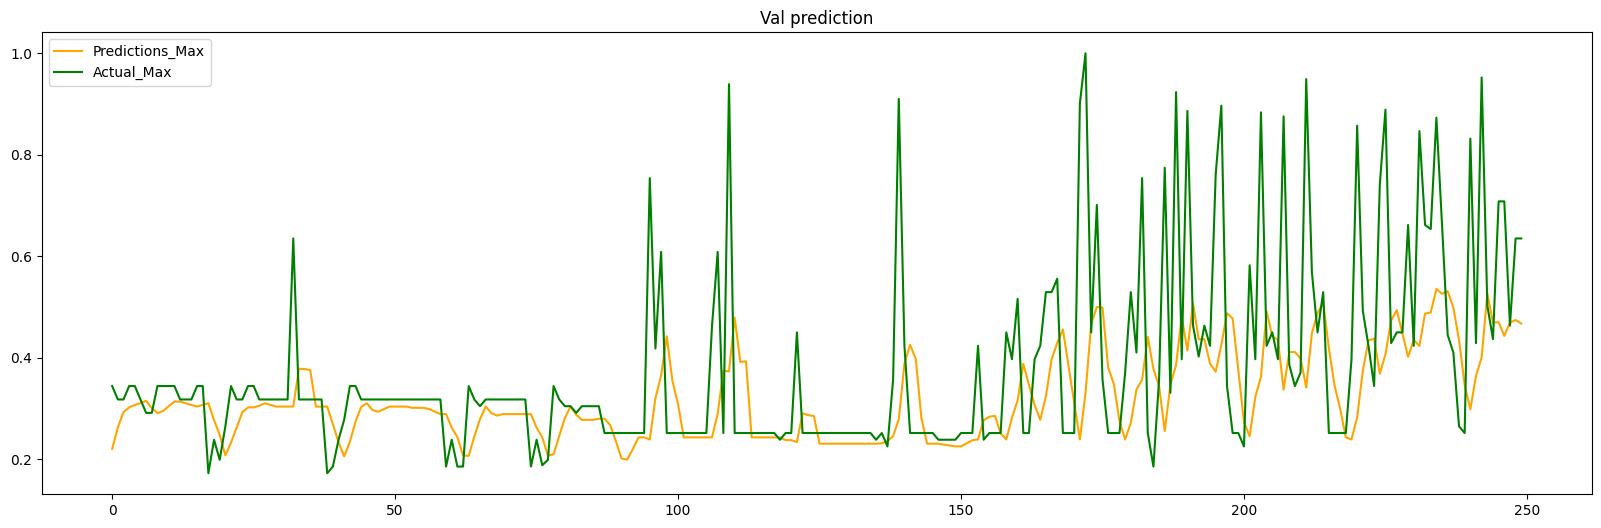

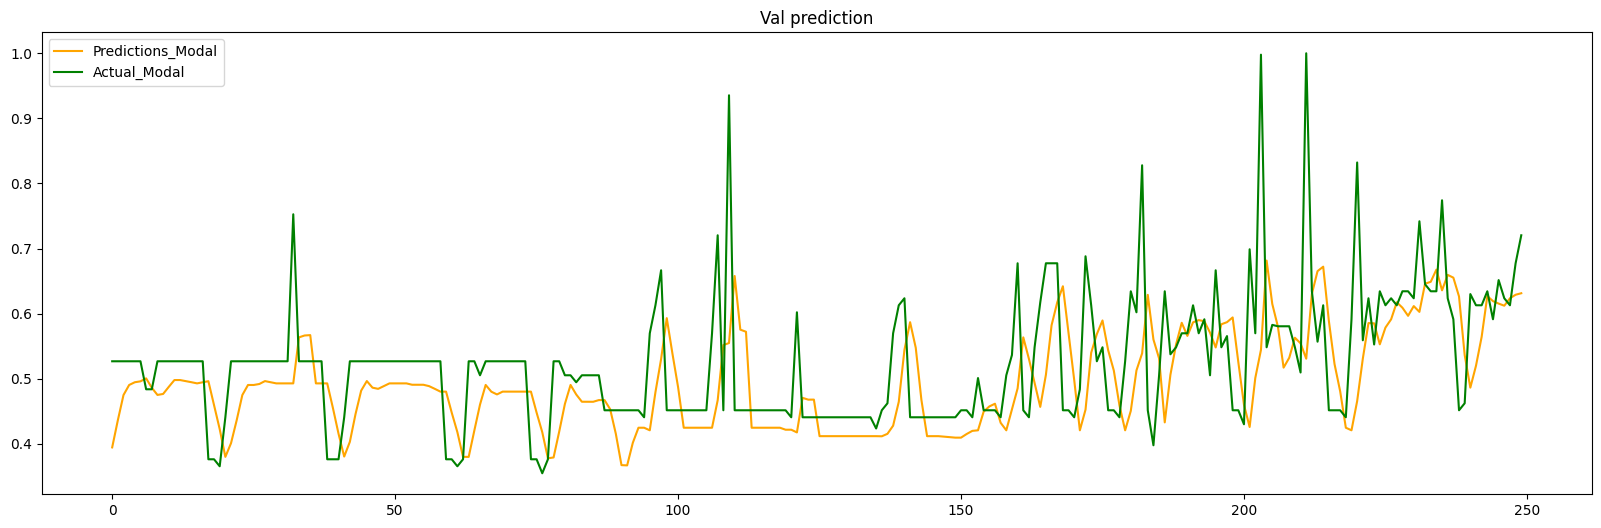

In [57]:
plot_predictions(model_coca, X_val, y_val, start=0, end=len(X_val), tag='Val prediction')

Mean absolute error for Test prediction is 0.08823845740894315
-------------------------------------------------------------------------------------
r2 for Test prediction is -8.308296937020392
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.679161    0.792746        0.465879    0.634921          0.641370   
1        0.728943    0.740933        0.500718    0.423280          0.672433   
2        0.705206    0.704663        0.466085    0.476190          0.649162   
3        0.686612    0.611399        0.435627    0.634921          0.620971   
4        0.645530    0.663212        0.425389    0.476190          0.599542   
5        0.625412    0.481865        0.427127    0.264550          0.599857   
6        0.552597    0.481865        0.377370    0.251323          0.552114   
7        0.511032    0.624352        0.310817    0.816667          0.496338   
8        

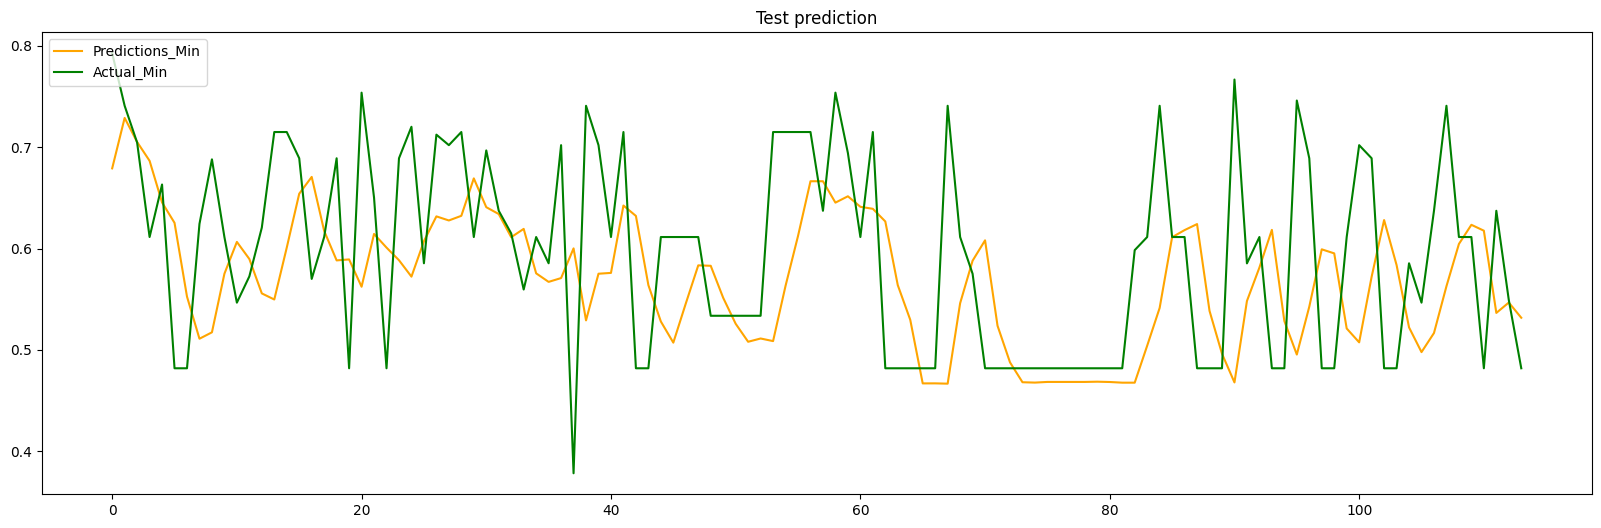

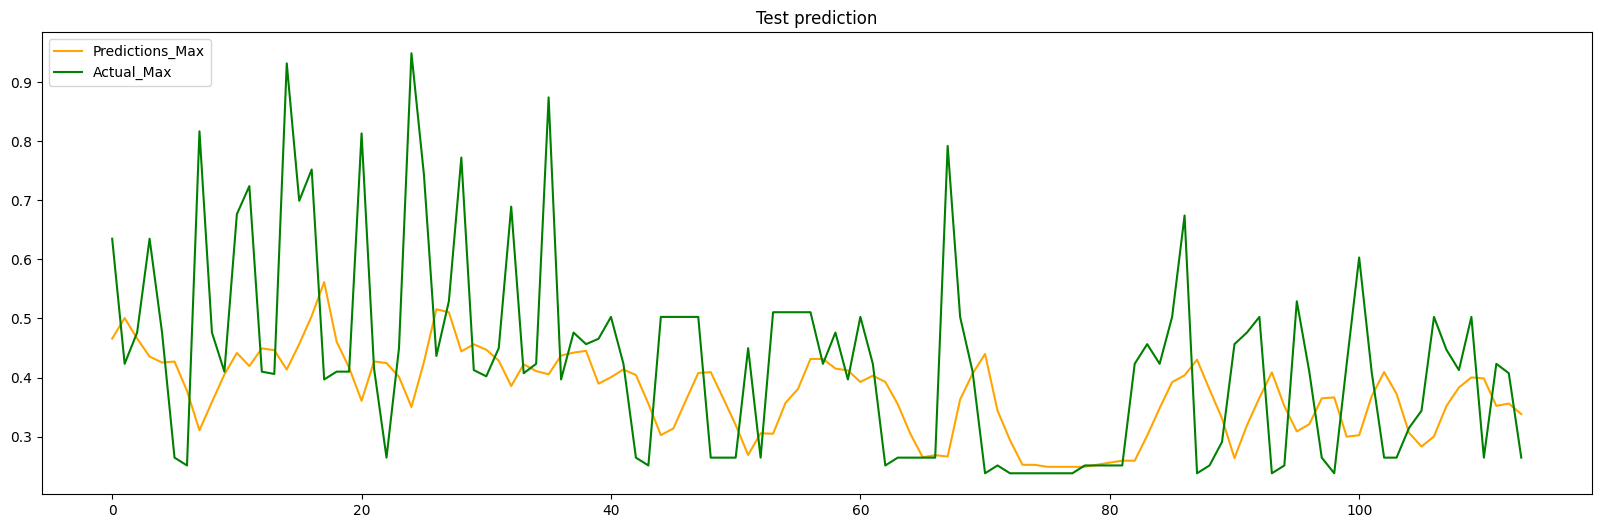

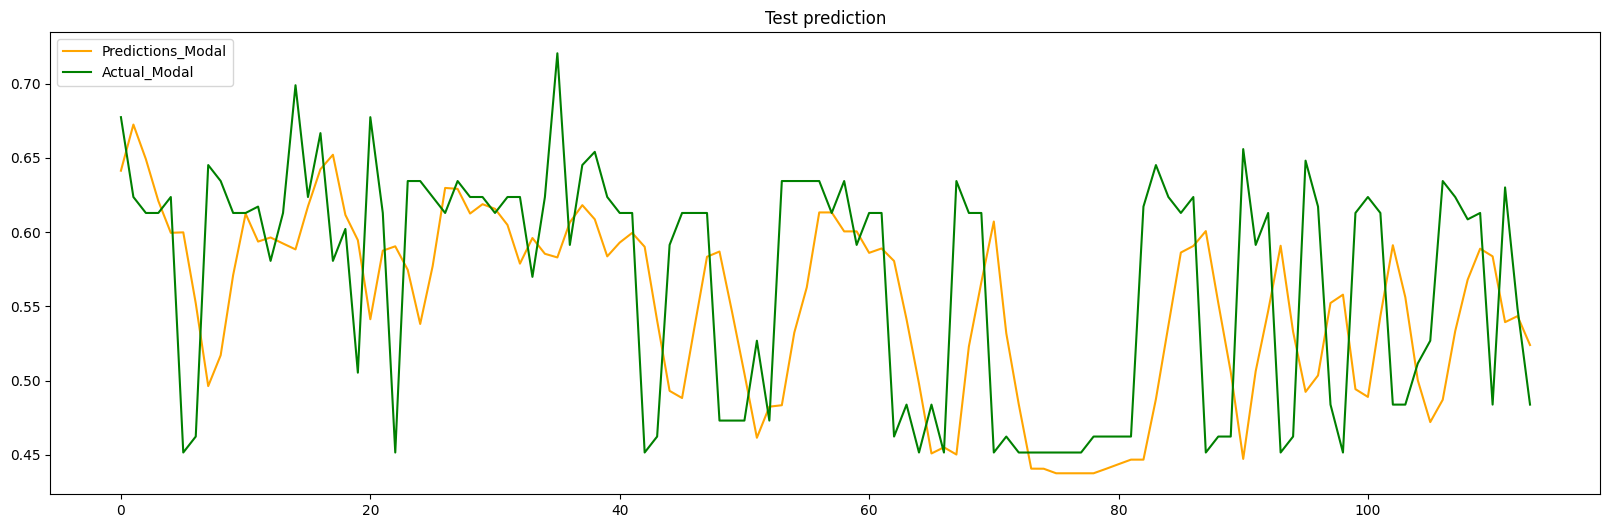

In [58]:
plot_predictions(model_coca, X_test, y_test, start=0, end=len(X_test), tag='Test prediction')

Already saved during training

In [62]:
# from tensorflow.keras.models import save_model

# # Assuming 'model_coca' is your trained Keras model
# model_coca.save('models\Coca\model_coca(3,3) 83.138.keras')

In [60]:
model_coca.save_weights('.\models\Coca\coca_model.weights.h5')

In [61]:
model_copy = create_model()
model_copy.load_weights('.\models\Coca\coca_model.weights.h5')

d:\Asus_win64\Code\Python\Machine_Learning\Internship\Internship Repository Fork\aiml-internship\.internship-project-venv\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Will not use this

In [91]:
from tensorflow.keras.models import load_model

model_bestmodel = load_model('models\Coca\coca_model.keras')

In [62]:
import joblib

joblib.dump(scaler_coca,'./Scaler Objects/scaler_coca.pkl')

['./Scaler Objects/scaler_coca.pkl']

### Recursive prediction for next 31 days

In [63]:
recursive_prediction = []

last_batch = X_test[-3,:,:].copy()

for i in range(31):
    reshaped_data = last_batch.reshape(1,last_batch.shape[0],last_batch.shape[1]) 
    next_day_prediction = model_copy.predict(reshaped_data,verbose=0)
    recursive_prediction.append(next_day_prediction)
    last_batch[-1] = next_day_prediction

In [64]:
for j in recursive_prediction:
    print(j)

[[0.5365037  0.3520595  0.53938854]]
[[0.5554229  0.37000844 0.5559501 ]]
[[0.56153417 0.37440217 0.5605007 ]]
[[0.56344837 0.37558097 0.5617555 ]]
[[0.5640382  0.37591255 0.5621088 ]]
[[0.5642182  0.37600827 0.5622103 ]]
[[0.5642729  0.37603638 0.56223994]]
[[0.56428945 0.3760447  0.5622487 ]]
[[0.56429446 0.37604722 0.5622514 ]]
[[0.56429595 0.376048   0.5622521 ]]
[[0.5642964  0.3760482  0.56225234]]
[[0.5642965 0.3760482 0.5622524]]
[[0.56429654 0.37604827 0.56225246]]
[[0.5642966  0.3760482  0.56225246]]
[[0.5642966  0.37604827 0.56225246]]
[[0.5642966  0.3760482  0.56225246]]
[[0.5642966  0.37604827 0.56225246]]
[[0.5642966  0.3760482  0.56225246]]
[[0.5642966  0.37604827 0.56225246]]
[[0.5642966  0.3760482  0.56225246]]
[[0.5642966  0.37604827 0.56225246]]
[[0.5642966  0.3760482  0.56225246]]
[[0.5642966  0.37604827 0.56225246]]
[[0.5642966  0.3760482  0.56225246]]
[[0.5642966  0.37604827 0.56225246]]
[[0.5642966  0.3760482  0.56225246]]
[[0.5642966  0.37604827 0.56225246]]
[[0.

In [67]:
for k in recursive_prediction:
    k = scaler_coca.inverse_transform(k) 
    print(k)

[[22042.688 28957.291 27400.715]]
[[22795.52  30278.95  28489.064]]
[[23069.025 30720.902 28847.559]]
[[23167.375 30868.81  28967.744]]
[[23202.438 30918.377 29008.459]]
[[23214.854 30935.025 29022.33 ]]
[[23219.227 30940.627 29027.076]]
[[23220.764 30942.514 29028.697]]
[[23221.295 30943.154 29029.248]]
[[23221.479 30943.371 29029.443]]
[[23221.545 30943.443 29029.504]]
[[23221.568 30943.467 29029.53 ]]
[[23221.574 30943.475 29029.535]]
[[23221.576 30943.477 29029.54 ]]
[[23221.578 30943.477 29029.543]]
[[23221.58  30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30